# Центральная предельная теорема своими руками

## Равномерное распределение
Возмем его. Непрерывное, достаточно непохожее на нормальное.

Его матожидание $EX = \frac{1}{2}({a+b})$

Дисперсия $DX = \frac{1}{12}(b - a)^2$

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import uniform, norm
%matplotlib inline

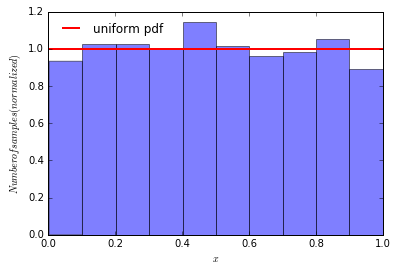

In [20]:
# Нарисуем PDF для равномерного распределения
x = np.linspace(0, 1.0, 100)
plt.plot(x, uniform.pdf(x), 'r-', lw=2, label='uniform pdf')

# Сделаем выборку объема 1000
r = uniform.rvs(size=1000)

# Нарисуем гистограмму
plt.hist(r, normed=True, alpha=0.5)

# Подпишем и покажем
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$Number of samples (normalized)$')
plt.show()

In [23]:
# Функция вернет выборку длины length выборочных средних выборок длины n из распределения rv
def sample_mean_n(n, rv, length=1000):
    return [np.mean(rv.rvs(size=n)) for x in xrange(length)]

# Соберем выборки длин 5, 10, 50
samples = [(n, sample_mean_n(n, uniform)) for n in [5, 10, 50]]

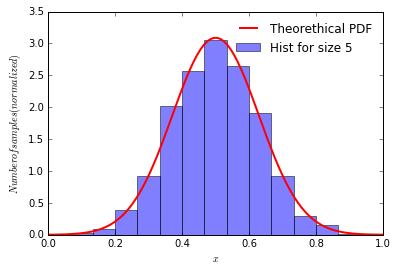

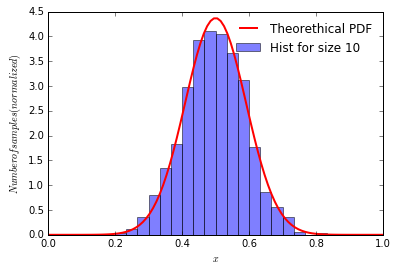

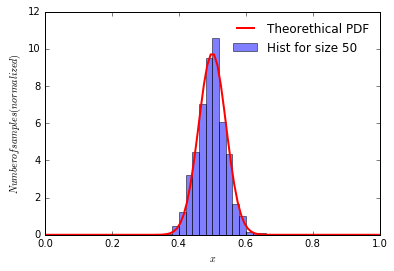

In [24]:
# Теоретические моменты равномерно распределенной случайной величины
mean = uniform.mean() # 1/2
var = uniform.var() # 1/12

# Для каждого n нарисуем гистограммы расп
for n, sample in samples:
    # Выберем более наглядное кол-во бакетов в гистограмме
    bins = 50 if n == 50 else n * 3

    # Нарисуем гистограмму
    plt.hist(
        sample,
        normed=True,
        alpha=0.5,
        label="Hist for size {sz}".format(sz=n),
        bins=bins,
        range=[0.0, 1.0]
    )

    # И теоретическую плотность распределения
    # Обратите внимание на второй параметр для нормального распределения как следствие ЦПТ
    scaled_var = np.sqrt(var / float(n))
    plt.plot(x, norm.pdf(x, loc=mean, scale=scaled_var), color='r', lw=2, label="Theorethical PDF")
    plt.legend(loc='best', frameon=False)
    plt.xlabel("$x$")
    plt.ylabel("$Number of samples (normalized)$".format(m=mean, v=round(scaled_var, 3)))
    
    # Готово!
    plt.show()

## Вывод
Действительно, распределение выборочных средних приближается нормальным распределением, о чем и говорит центральная предельная теорема.